In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from joblib import dump


In [2]:
# Load and Preprocess Dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')
df['smoking_history'] = df['smoking_history'].map(
    lambda x: 'non-smoker' if x in ['never', 'No Info'] else 
    'current' if x == 'current' else 'past_smoker'
)

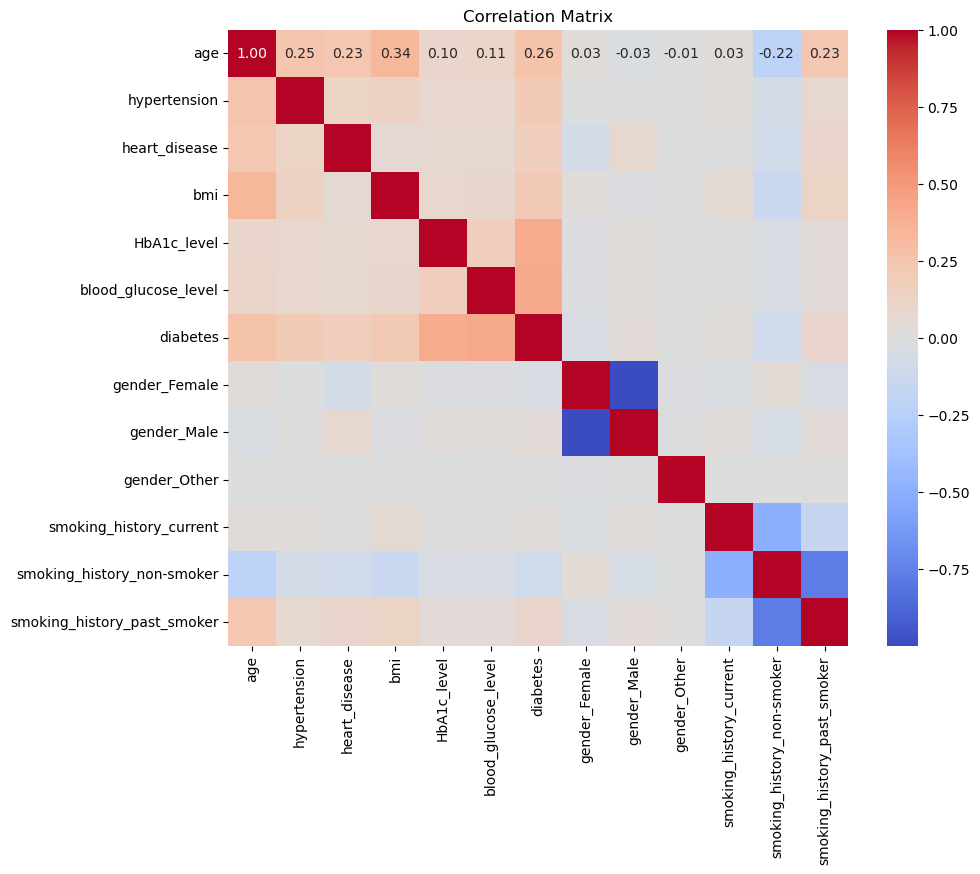

In [3]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['gender', 'smoking_history'])

In [5]:
# Data Preprocessing for Machine Learning
X = df.drop('diabetes', axis=1)
y = df['diabetes']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']),
    ('cat', OneHotEncoder(), ['gender_Male', 'gender_Female', 'smoking_history_non-smoker', 'smoking_history_current', 'smoking_history_past_smoker'])
])

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [6]:
# Model Building Pipeline
clf = imbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('over', over),
    ('under', under),
    ('classifier', RandomForestClassifier())
])

In [7]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(clf, param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
grid_search.fit(X_train, y_train)

/home/mateuszbebnowicz/miniconda3/envs/eng_thesis/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/mateuszbebnowicz/miniconda3/envs/eng_thesis/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/mateuszbebnowicz/miniconda3/envs/eng_thesis/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/mateuszbebnowicz/miniconda3/envs/eng_thesis/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'bmi',
                                                                          'HbA1c_level',
                                                                          'blood_glucose_level']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['gender_Male',
                                                                          'gender_Female',
                                                                          'smoking_history_non-smoker',
                                                                          'smoking_history_current',
                                                                          'smoking_history_past_smoker'])])),
                                       ('over', SMOTE(sampling_strategy=0.1)),
                                       ('under',
                                        RandomUnderSampler(sampling_strategy=0.5)),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [10, 20],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]})

/home/mateuszbebnowicz/miniconda3/envs/eng_thesis/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/mateuszbebnowicz/miniconda3/envs/eng_thesis/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/mateuszbebnowicz/miniconda3/envs/eng_thesis/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Accuracy: 0.9528
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.69      0.80      0.74      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.88      0.86     20000
weighted avg       0.96      0.95      0.95     20000



/home/mateuszbebnowicz/miniconda3/envs/eng_thesis/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/mateuszbebnowicz/miniconda3/envs/eng_thesis/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/mateuszbebnowicz/miniconda3/envs/eng_thesis/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/mateuszbebnowicz/miniconda3/envs/eng_thesis/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated 

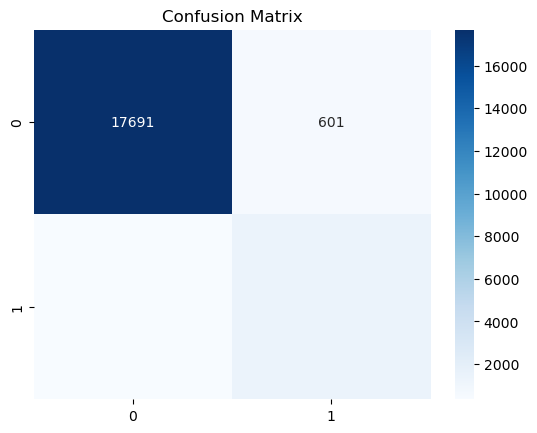

In [8]:
# Model Evaluation
y_pred = grid_search.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()